# Independent Project: Comparing Datasets -  Analyzing Graduation Data of New York City Public Schools

In New York state, students are required to pass an exam known as the Regents exam in order to earn their high school diploma. Historically, students were able to earn an equivalent diploma without passing the Regents exam, called the Local diploma. Beginning in 2019, [students entering the 9th grade no longer have the option to earn a local diploma](https://en.wikipedia.org/wiki/Regents_Examinations#Exam_requirements), and are required to pass the Regents exam to earn their diploma (an exception is made for students with disabilities). I hypothesize that due to existing inequalities, this will disproportionately affect Black and Latino students, leading to fewer students in these demographics earning their high school diploma. Not having a high school diploma is linked to negative life paths: high school dropouts have much [lower earnings, higher incarceration rates](https://education.seattlepi.com/effects-high-school-students-not-finishing-high-school-3118.html), and even [worse health outcomes](https://theconversation.com/the-data-is-in-americans-who-dont-finish-high-school-are-less-healthy-than-the-rest-of-the-us-103663) than people who finish high school. If my hypothesis is correct, the elimination of the Local diploma runs the risk of increasing long-term racial inequalities in New York City. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
grad_data = pd.read_csv('/Users/Austen/Desktop/python/2005-2010_Graduation_Outcomes_-_School_Level.csv')
grad_data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


In [2]:
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Demographic                         25096 non-null  object 
 1   DBN                                 25096 non-null  object 
 2   School Name                         25096 non-null  object 
 3   Cohort                              25096 non-null  object 
 4   Total Cohort                        25096 non-null  int64  
 5   Total Grads - n                     25096 non-null  object 
 6   Total Grads - % of cohort           16704 non-null  float64
 7   Total Regents - n                   25096 non-null  object 
 8   Total Regents - % of cohort         16704 non-null  float64
 9   Total Regents - % of grads          16652 non-null  float64
 10  Advanced Regents - n                25096 non-null  object 
 11  Advanced Regents - % of cohort      16704

There is a problem with this dataset - many of the numeric columns are registering with an object data type. One of the most important ones is 'Cohort', which we can see even by the head of the dataset contains entries such as '2006 Aug'. Since the later date has a slightly higher number of students, I will convert the date to only contain the year, and then keep the row with a higher number of students.

Note: the cohort year is the year that students are entering 9th grade.

In [3]:
dates = grad_data['Cohort'].unique()
print(dates)

['2003' '2004' '2005' '2006' '2006 Aug' '2001' '2002']


Only the 2006 has a separate August entry, so I will only need to clean that.

In [4]:
aug = grad_data[grad_data['Cohort'] == '2006 Aug']
print(len(aug))

4131


In [5]:
grad_data['Cohort'] = grad_data['Cohort'].str.replace('2006 Aug', '2006')
grad_data['Cohort'] =grad_data['Cohort'].astype(int)
grad_data = grad_data.drop_duplicates(subset = ['Demographic','DBN','School Name','Cohort','Total Cohort'],keep = 'last')
grad_data.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,44,56.4,37,47.4,84.1,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.9,32,50.0,69.6,...,25,39.1,54.3,14,21.9,30.4,10,15.6,6,9.4


If the cohort size was less than 20, then all data was surpressed; I will therefore focus on cohorts where the data is available. I am also focusing on racial demographics, so I will remove other demographic counts. 

In [6]:
grad_data_avail = grad_data[grad_data['Total Cohort'] >20]
#grad_data_avail = grad_data_avail[grad_data_avail ]
grad_data_avail['Demographic'].value_counts()

General Education Students     1819
Total Cohort                   1812
English Proficient Students    1774
Female                         1740
Male                           1692
Black                          1441
Hispanic                       1416
Special Education Students      802
English Language Learners       494
Asian                           438
White                           435
Name: Demographic, dtype: int64

In [7]:
grad_data_avail = grad_data_avail[grad_data_avail['Demographic'].isin(['Total Cohort','Black','White','Asian','Hispanic'])]

I am curious, however, how the demographic distribution is affected by this change: to see the effect, I will pivot both tables.

In [8]:
pivot_all = pd.DataFrame(grad_data.pivot_table(values = 'DBN',index ='Demographic', aggfunc = 'count',))
pivot_all=pivot_all.rename(columns = {'DBN':'Count Total'})
print(pivot_all)
# since I have not scrubbed the original dataframe of unneccessary demographic groups, they appear in this pivot table.
# They do not transfer to the final table, however.

                             Count Total
Demographic                             
Asian                               1484
Black                               2009
English Language Learners           1696
English Proficient Students         2070
Female                              2001
General Education Students          2065
Hispanic                            1990
Male                                2017
Special Education Students          2059
Total Cohort                        2088
White                               1485


In [9]:
pivot_avail = pd.DataFrame(grad_data_avail.pivot_table(values = 'DBN',index ='Demographic', aggfunc = 'count',))
pivot_avail = pivot_avail.rename(columns = {'DBN':'Count Available'})
print(pivot_avail)

              Count Available
Demographic                  
Asian                     438
Black                    1441
Hispanic                 1416
Total Cohort             1812
White                     435


In [10]:
pivot_merge = pd.merge(pivot_all,pivot_avail, on = 'Demographic')
pivot_merge['% Available'] = round(100*pivot_merge['Count Available']/pivot_merge['Count Total'],2)
print(pivot_merge)

              Count Total  Count Available  % Available
Demographic                                            
Asian                1484              438        29.51
Black                2009             1441        71.73
Hispanic             1990             1416        71.16
Total Cohort         2088             1812        86.78
White                1485              435        29.29


So we can see that some demographics have a much smaller pool of data avaiable than others, in particular, the White and  Asianhave a low percentage of available information. This is important to be mindful of when conducting analysis, but may not affect the outcome. If anything, this speaks to a relatively low number of these demographics enrolled in NYC public schools. 

In [11]:
student_count = pd.DataFrame(grad_data.pivot_table(values = 'Total Cohort',index ='Demographic', aggfunc = 'sum'))
total_num_students = grad_data[grad_data['Demographic'] == 'Total Cohort']['Total Cohort'].sum()
student_count['percentage']=round(100*student_count['Total Cohort']/total_num_students,2)
student_count = student_count.sort_values(by='percentage')
print(student_count)
#once again, I am using the entire dataframe, including irrelevant demographics. This is just because I am looking at 
# percentages of the entire student body.

                             Total Cohort  percentage
Demographic                                          
English Language Learners           47636       11.50
White                               60155       14.52
Asian                               61952       14.96
Special Education Students          99491       24.02
Black                              139758       33.74
Hispanic                           149833       36.17
Male                               205554       49.62
Female                             208690       50.38
English Proficient Students        366608       88.50
General Education Students         370595       89.46
Total Cohort                       414244      100.00


As suspected, the total number of students in the white and asian demographics with low data availability make up a smaller percentage of total student population. With this knowledge I can now look at diploma types earned. 

In [12]:
grad_rate_pivot = pd.DataFrame(grad_data_avail.pivot_table(values = 'Total Grads - % of cohort', index = 'Demographic'))
regents_pivot = pd.DataFrame(grad_data_avail.pivot_table(values = 'Total Regents - % of cohort', index = 'Demographic'))
local_dip_pivot = pd.DataFrame(grad_data_avail.pivot_table(values = 'Local - % of cohort', index = 'Demographic'))
stats_pivot_merged_1 = pd.merge(grad_rate_pivot, regents_pivot, on = 'Demographic')
stats_pivot_merged = pd.merge(stats_pivot_merged_1, local_dip_pivot, on = 'Demographic')
stats_pivot_merged = pd.DataFrame(stats_pivot_merged)
stats_pivot_merged['Total Grads - % of cohort'] = round(stats_pivot_merged['Total Grads - % of cohort'],2) 
stats_pivot_merged['Total Regents - % of cohort'] = round(stats_pivot_merged['Total Regents - % of cohort'],2) 
stats_pivot_merged['Local - % of cohort'] = round(stats_pivot_merged['Local - % of cohort'],2)
print(stats_pivot_merged)

              Total Grads - % of cohort  Total Regents - % of cohort  \
Demographic                                                            
Asian                             76.03                        65.90   
Black                             58.20                        37.60   
Hispanic                          56.41                        36.82   
Total Cohort                      60.97                        41.48   
White                             73.05                        60.94   

              Local - % of cohort  
Demographic                        
Asian                       10.15  
Black                       20.61  
Hispanic                    19.60  
Total Cohort                19.51  
White                       12.12  


19.5% of students graduated with a Local diploma. We can see looking at this data that white and asian students are more likely to graduate with regents (as well as graudate in general) as well as less likely to graduate with a Local diploma. To further explore this trend, I will look at how the number of students earning the local diploma has changed over time.

In [13]:
df = grad_data_avail.pivot_table(values ='Local - % of cohort',index = 'Demographic', columns = 'Cohort' )
print(df)


Cohort             2001       2002       2003       2004       2005       2006
Demographic                                                                   
Asian         16.122857  11.801370   9.539130   9.406579   7.566216   6.859211
Black         24.000592  22.328646  22.706818  20.771374  18.739932  17.816066
Hispanic      22.992529  21.581152  20.821659  20.554475  18.065603  16.030508
Total Cohort  24.073973  21.723293  21.005396  19.834969  17.402210  16.030688
White         16.312000  13.685333  12.325714   9.388571  11.038028   9.704054


(0.0, 25.0)

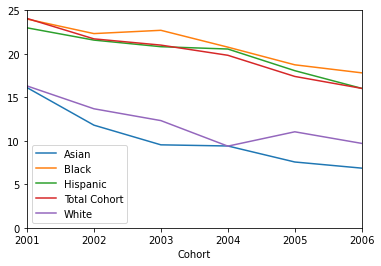

In [14]:
df = df.reset_index()
# The index must be reset on a numeric scale instead of demographic variable in order to conduct melt function 
# and produce a graph of the data.
melt = pd.melt(df,id_vars='Demographic')
melt.set_index('Cohort', inplace=True)
melt.groupby('Demographic')['value'].plot(legend=True)
plt.xlim(2001,2006)
plt.ylim(0,25)

We can see that the number of Local diplomas earned decreased across all demographic groups from the 2001-2006 cohorts, which gives me pause on my hypothesis. Before making any conclusions, I decided to see if there was any more recent graduation data available. I referred back to [NYC open data](https://opendata.cityofnewyork.us/) and found that the [most recent dataset](https://data.cityofnewyork.us/Education/2017-2018-Graduation-Outcomes-School/kybe-9iex) has graduation data through the 2014 Cohort. I'm going to plot the data from this dataset to see whether the number of students who earned the local diploma continued to decrease between the 2006 and 2014 cohorts.

In [15]:
data_2014 = pd.read_csv('/Users/Austen/Downloads/2017_-_2018_Graduation_Outcomes_School.csv')
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508193 entries, 0 to 508192
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   DBN                               508193 non-null  object
 1   School Name                       508193 non-null  object
 2   Demographic Category              508193 non-null  object
 3   Demographic Variable              508193 non-null  object
 4   Cohort Year                       508193 non-null  int64 
 5   Cohort                            508193 non-null  object
 6   Total Cohort #                    508193 non-null  int64 
 7   Total Grads #                     508193 non-null  object
 8   Total Grads % of cohort           508193 non-null  object
 9   Total Regents #                   508193 non-null  object
 10  Total Regents % of cohort         508193 non-null  object
 11  Total Regents % of grads          508193 non-null  object
 12  Ad

In [16]:
data_2014.head(5)

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2014,4 year August,29,28,96.6,25,...,25,86.2,89.3,3,10.3,10.7,0,0.0,1,3.4
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2013,4 year August,36,25,69.4,23,...,23,63.9,92.0,2,5.6,8.0,3,8.3,7,19.4
2,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2012,4 year August,44,24,54.5,20,...,19,43.2,79.2,4,9.1,16.7,10,22.7,10,22.7
3,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2011,4 year August,73,46,63.0,41,...,41,56.2,89.1,5,6.8,10.9,18,24.7,7,9.6
4,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2010,4 year August,61,26,42.6,26,...,25,41.0,96.2,0,0.0,0.0,18,29.5,17,27.9


In [17]:
print(data_2014['Cohort'].value_counts())

4 year June      122635
5 year June      109788
6 year June      100040
4 year August     98212
5 year August     77518
Name: Cohort, dtype: int64


In this dataset, the cohorts have data stored across five possible categories, depending on when the students graduated. The quickest graduation time is 4 Years with a June graduation, and the latest is a six year June graduation. To get a feel for what this data looks like for one cohort, I will pick one out and examine it. 

In [18]:
Orchard_2010 = data_2014[(data_2014['DBN']=='01M292') & (data_2014['Cohort Year']==2010)&(data_2014['Demographic Variable']=='All Students')]
print(Orchard_2010)

       DBN                 School Name Demographic Category  \
4   01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
14  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
25  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
33  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   
43  01M292  ORCHARD COLLEGIATE ACADEMY         All Students   

   Demographic Variable  Cohort Year         Cohort  Total Cohort #  \
4          All Students         2010  4 year August              61   
14         All Students         2010    4 year June              61   
25         All Students         2010  5 year August              55   
33         All Students         2010    5 year June              55   
43         All Students         2010    6 year June              54   

   Total Grads # Total Grads % of cohort Total Regents #  ...  \
4             26                    42.6              26  ...   
14            24                    39.3              24  ...   

After looking at graduation data for several different cohorts, I noticed the following patterns: 
1. The 2014 cohort only has 4 year graduation data available; 2013 cohort only has 4&5 year data.
2. The latest graduation date has the highest number of graduates. Because of this, I will be focusing on the latest graduation date available for each cohort. 
3. In some cases the cohort size changes; this is not due to students dropping out, which is monitored in this data. It is most likely due to students changing schools. 

In [19]:
data_2014 = data_2014.sort_values(by=['DBN','Demographic Category','Cohort Year'])
data_2014.head()

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
21,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,4 year June,5,0,0.0,0,...,0,0.0,No Data,0,0.0,No Data,4,80.0,1,20.0
40,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,5 year June,5,3,60.0,0,...,0,0.0,0.0,3,60.0,100.0,0,0.0,2,40.0
50,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,6 year June,5,3,60.0,0,...,0,0.0,0.0,3,60.0,100.0,0,0.0,2,40.0
20,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2004,4 year June,55,37,67.3,17,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
39,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2004,5 year June,58,39,67.2,18,...,18,31.0,46.2,21,36.2,53.8,4,6.9,13,22.4


In [20]:
data_2014 = data_2014.drop_duplicates(subset = ['DBN','School Name','Demographic Category','Demographic Variable','Cohort Year'],keep = 'last')
data_2014.head()

,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
50,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2003,6 year June,5,3,60.0,0,...,0,0.0,0.0,3,60.0,100.0,0,0.0,2,40.0
49,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2004,6 year June,56,41,73.2,18,...,18,32.1,43.9,23,41.1,56.1,2,3.6,12,21.4
48,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2005,6 year June,65,47,72.3,29,...,29,44.6,61.7,18,27.7,38.3,1,1.5,11,16.9
47,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2006,6 year June,73,44,60.3,36,...,36,49.3,81.8,8,11.0,18.2,1,1.4,21,28.8
46,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,2007,6 year June,77,53,68.8,31,...,31,40.3,58.5,22,28.6,41.5,2,2.6,14,18.2


In [21]:
print(data_2014['Cohort'].value_counts())

6 year June    100040
4 year June     12689
5 year June     11979
Name: Cohort, dtype: int64


In this dataset, data in all rows with fewer than five students was surpressed (compared to the threshold of 20 in the original dataset) So I will remove all rows with fewer than five students in the total cohort.


In [22]:
data_2014_avail = data_2014[data_2014['Total Cohort #']>5]

Another difference from the other dataset is that Demographic is split into two columns: Category and Variable. 

In [23]:
print(data_2014_avail['Demographic Category'].value_counts())

Gender by Ethnicity    24925
Ethnicity              14846
ELL Status             13111
Gender                 10719
Poverty Status         10355
SWD Status              9849
All Students            5458
Name: Demographic Category, dtype: int64


In [24]:
print(data_2014_avail['Demographic Variable'].value_counts())

All Students              5458
Not SWD                   5434
Econ Disadv               5420
Not ELL                   5383
Female                    5372
Male                      5347
Hispanic                  5224
Black                     5161
Not Econ Disadv           4935
Female Hispanic           4755
Female Black              4671
Male Black                4607
Male Hispanic             4588
SWD                       4415
ELL                       2612
Asian                     2193
White                     1986
Never ELL                 1767
Male Asian                1606
Female Asian              1560
Male White                1544
Ever ELL                  1471
Female White              1387
Former ELL                1107
Current ELL                771
Multi-Racial               155
Native American            127
Female Multi-Racial         72
Male Multi-Racial           59
Male Native American        44
Female Native American      32
Name: Demographic Variable, dtype: int6

Since we are focusing on disparities in graduation rates amongst racial groups, I will filter the category for this. 

In [25]:
data_2014_avail = data_2014_avail[data_2014_avail['Demographic Category'].isin(['All Students', 'Ethnicity','Gender by Ethnicity'])]

A possible point of concern is that the categories 'Gender by Ethnicity' and 'Ethnicity' may give overlapping data - something that could negatively affect analysis if I were to simplify the 'Gender by Ethnicity' into 'Ethnicity', which I would like to do for the sake of my analysis. My intuition tells me that it is possible that the Gender by Ethnicity column was introduced as a data point more recently, and is taking the place of the 'Ethnicity' data point for more recent cohorts. I will test this theory now by looking at one cohort from one school.

In [26]:
Bushwick = data_2014_avail[(data_2014_avail['DBN']=='32K564')&(data_2014_avail['Cohort Year']==2008)]
print(Bushwick)

           DBN                     School Name Demographic Category  \
507093  32K564  BUSHWICK COMMUNITY HIGH SCHOOL         All Students   
507358  32K564  BUSHWICK COMMUNITY HIGH SCHOOL            Ethnicity   
507415  32K564  BUSHWICK COMMUNITY HIGH SCHOOL            Ethnicity   
507671  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   
507728  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   
507866  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   
507923  32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Gender by Ethnicity   

       Demographic Variable  Cohort Year       Cohort  Total Cohort #  \
507093         All Students         2008  6 year June             203   
507358                Black         2008  6 year June              67   
507415             Hispanic         2008  6 year June             129   
507671         Female Black         2008  6 year June              35   
507728      Female Hispanic         2008  6 year June             

Looking at this data, I can see that the number of male and female students of a racial group sum to the total number of students from the racial group. Seeing that this data overlaps completely, I will remove the 'Gender by Ethnicity' Demographic cateogry.

In [27]:
data_2014_avail = data_2014_avail[data_2014_avail['Demographic Category'].isin(['All Students', 'Ethnicity'])]
data_2014_avail['Demographic Variable'].value_counts()

All Students       5458
Hispanic           5224
Black              5161
Asian              2193
White              1986
Multi-Racial        155
Native American     127
Name: Demographic Variable, dtype: int64

Interestingly, this updated dataset contains information on Multi-Racial and Native American students, nieither of which were present previously. 

In [28]:
pivot_2014 = data_2014_avail.pivot_table(values = 'Total Cohort #',index ='Demographic Variable', aggfunc = 'sum')
print(pivot_2014)

                      Total Cohort #
Demographic Variable                
All Students                 1001326
Asian                         156865
Black                         313183
Hispanic                      376909
Multi-Racial                    2073
Native American                 1366
White                         132998


The number of students in these new groups is much smaller than other groups, so graduation rate for these groups may not be as reliable as for the other groups. 

In order to convert our numeric data to numeric data type, we need to ensure that all rows with more than five students do not have 's' in any numeric rows, standing for supressed. My first attempt to convert the data type of the 'Local % of Cohort' problem gave me an error, so I know that some rows still have non-numeric data types. Conveniently, getting rid of rows with 's' in one category should get rid of rows with any 's' values, so I should be able to convert any of these rows to numeric types for further analysis.

In [29]:
data_2014_avail['Local % of cohort'].value_counts()

0.0     3443
s       1759
14.3     204
16.7     187
11.1     154
        ... 
58.5       1
89.7       1
63.5       1
55.3       1
67.5       1
Name: Local % of cohort, Length: 707, dtype: int64

(0.0, 40.0)

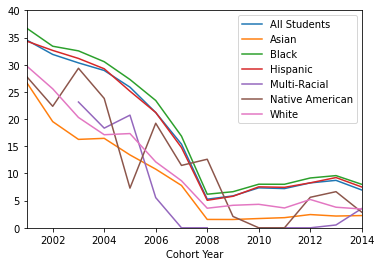

In [30]:
data_2014_avail = data_2014_avail[data_2014_avail['Local % of cohort'] != 's']
#local diploma grads
data_2014_avail['Local % of cohort'] =data_2014_avail['Local % of cohort'].astype(float)
pivot_2014 = data_2014_avail.pivot_table(values ='Local % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' )
pivot_graph = pivot_2014.reset_index()
melt_2014 = pd.melt(pivot_graph,id_vars='Demographic Variable')
melt_2014.set_index('Cohort Year', inplace=True)
melt_2014.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,40)

Although Black and Latino students still earn more Local diplomas than other racial groups, the drastic decrease in Local diplomas for all groups between 2005 and 2018 suggests that more and more students are graduating with the Regents diploma instead. But is that really the case? I will now plot the number of students who have earned a Regents diploma, as well as those who dropped out, as a comparison:

*Note: the 2014 data shows a lower graduation rate than the year before because we only have data on the 4-year graduation rate for this cohort, as opposed to other cohorts which have 5-6 year graduation rates.* 

(0.0, 100.0)

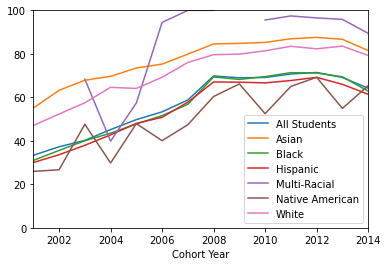

In [31]:
#Regents Diploma
data_2014_avail['Total Regents % of cohort'] =data_2014_avail['Total Regents % of cohort'].astype(float)
pivot_2014_reg = data_2014_avail.pivot_table(values ='Total Regents % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' )
pivot_graph_reg = pivot_2014_reg.reset_index()
melt_2014_reg = pd.melt(pivot_graph_reg,id_vars='Demographic Variable')
melt_2014_reg.set_index('Cohort Year', inplace=True)
melt_2014_reg.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,100)

(0.0, 100.0)

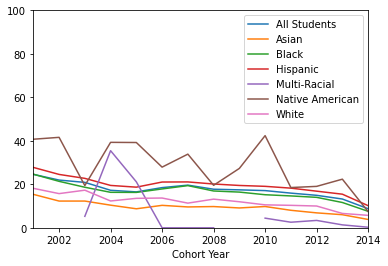

In [32]:
#Drop out rate
data_2014_avail['Dropped Out % of cohort'] =data_2014_avail['Dropped Out % of cohort'].astype(float)
pivot_2014_drop = pd.DataFrame(data_2014_avail.pivot_table(values ='Dropped Out % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' ))
pivot_graph_drop = pivot_2014_drop.reset_index()
melt_2014_drop = pd.melt(pivot_graph_drop,id_vars='Demographic Variable')
melt_2014_drop.set_index('Cohort Year', inplace=True)
melt_2014_drop.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,100)

(0.0, 100.0)

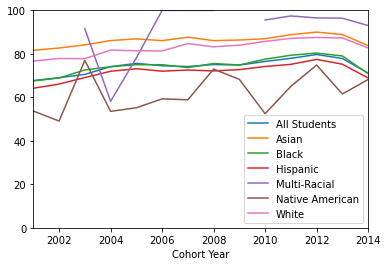

In [33]:
# Total Grad Rate 
data_2014_avail['Total Grads % of cohort'] =data_2014_avail['Total Grads % of cohort'].astype(float)
pivot_2014_total = pd.DataFrame(data_2014_avail.pivot_table(values ='Total Grads % of cohort',index = 'Demographic Variable', columns = 'Cohort Year' ))
pivot_graph_total = pivot_2014_total.reset_index()
melt_2014_total = pd.melt(pivot_graph_total,id_vars='Demographic Variable')
melt_2014_total.set_index('Cohort Year', inplace=True)
melt_2014_total.groupby('Demographic Variable')['value'].plot(legend=True)
plt.xlim(2001,2014)
plt.ylim(0,100)

The graphical results are interesting, and show a clear trend across all three outcomes: the number of dropouts and local diplomas have decreased, while the number of regents diplomas have increased. However, the total number of graduates has stayed fairly constant across all groups, with only a slight increase from 2001 to 2013. This would suggest that the decrease in Local diploma graduates is, in fact, being complemented by the increase in Regents grads. Now I want to see all of this data laid out next to each other. 

In [34]:
def delta(df):
    df['delta'] = round(df[2013]-df[2001],2)
    return df
#note: I am using 2013 data in the delta equation because the 2014 cohort only has 4-year graduation data available. 
def delta_df(df):
    df = delta(df)
    df = df.reset_index()
    new_df = df[['Demographic Variable','delta']].copy()
    return new_df 

delta_local = delta_df(pivot_2014)
delta_local = delta_local.rename(columns = {'delta':'delta_local'})
delta_dropouts = delta_df(pivot_2014_drop)
delta_dropouts = delta_dropouts.rename(columns = {'delta':'delta_dropouts'})
delta_regents = delta_df(pivot_2014_reg)
delta_regents = delta_regents.rename(columns = {'delta':'delta_regents'})
delta_total_grads = delta_df(pivot_2014_total)
delta_total_grads=delta_total_grads.rename(columns = {'delta':'delta_total_grads'})
delta_1 = pd.merge(delta_local,delta_dropouts, on = 'Demographic Variable')
delta_2 = pd.merge(delta_1, delta_regents, on = 'Demographic Variable')
delta_all = pd.merge(delta_2, delta_total_grads, on = 'Demographic Variable')
print(delta_all)

Cohort Year Demographic Variable  delta_local  delta_dropouts  delta_regents  \
0                   All Students       -25.79          -11.35          35.79   
1                          Asian       -24.50           -9.36          31.62   
2                          Black       -27.09          -13.02          38.45   
3                       Hispanic       -25.08          -12.31          35.97   
4                   Multi-Racial          NaN             NaN            NaN   
5                Native American       -21.12          -18.37          28.97   
6                          White       -25.94          -11.55          36.50   

Cohort Year  delta_total_grads  
0                        10.15  
1                         7.26  
2                        11.50  
3                        11.06  
4                          NaN  
5                         7.85  
6                        10.67  


As an overall trend, we can see that the number of dropouts and local diplomas have decreased (25.8% and 11.3% respectively) across all racial groups in the past 20 years, while Regents diplomas and the overall graduation rate have increased (35.8% and 10.2%) across all groups. 

However, we can see from the graphs that despite the promising trends, the number of Local diploma graduates hit a low with the 2008 cohort (2012-2014 graduation) and has since stabilized, increasing slightly in the cohorts since. Likewise, the number of students earning a Regents diploma has been mostly stable since 2008. If I change the delta function to look at the change in statistics since 2008, the numbers tell a less aspirational story: 

In [35]:
def delta(df):
    df['delta'] = round(df[2013]-df[2008],2)
    return df

def delta_df(df):
    df = delta(df)
    df = df.reset_index()
    new_df = df[['Demographic Variable','delta']].copy()
    return new_df 

delta_local = delta_df(pivot_2014)
delta_local = delta_local.rename(columns = {'delta':'delta_local'})
delta_dropouts = delta_df(pivot_2014_drop)
delta_dropouts = delta_dropouts.rename(columns = {'delta':'delta_dropouts'})
delta_regents = delta_df(pivot_2014_reg)
delta_regents = delta_regents.rename(columns = {'delta':'delta_regents'})
delta_total_grads = delta_df(pivot_2014_total)
delta_total_grads=delta_total_grads.rename(columns = {'delta':'delta_total_grads'})
delta_1 = pd.merge(delta_local,delta_dropouts, on = 'Demographic Variable')
delta_2 = pd.merge(delta_1, delta_regents, on = 'Demographic Variable')
delta_all = pd.merge(delta_2, delta_total_grads, on = 'Demographic Variable')
print(delta_all)

Cohort Year Demographic Variable  delta_local  delta_dropouts  delta_regents  \
0                   All Students         3.47           -4.51          -0.69   
1                          Asian         0.62           -3.75           2.15   
2                          Black         3.42           -5.29           0.06   
3                       Hispanic         4.18           -4.68          -1.09   
4                   Multi-Racial         0.52            1.35          -4.14   
5                Native American        -5.97            2.81          -5.47   
6                          White         0.18           -6.58           3.93   

Cohort Year  delta_total_grads  
0                         2.78  
1                         2.78  
2                         3.48  
3                         3.09  
4                        -3.62  
5                       -11.44  
6                         4.11  


There has been a continual slight increase in the number of graduates, as well as a corresponding decrease in the number of dropouts, across most groups. But the number of Local diploma grads has increased across most groups, and the number of Regents diploma has remained the same or even decreased for most groups. 

Given that we have seen a larger increase in the number of local diplomas earned for Black and Latino students compared to white and asian students, if this trend were to continue, then a disproportionate number of Black and Latino students will be locked out of a high school diploma due to the elimination of the local diploma. 

In [36]:
delta_local['avg rate of change']= round(delta_local['delta_local']/6,2)
# dividing the number by 6 because there were six cohorts 2008-2013.
print(delta_local)

Cohort Year Demographic Variable  delta_local  avg rate of change
0                   All Students         3.47                0.58
1                          Asian         0.62                0.10
2                          Black         3.42                0.57
3                       Hispanic         4.18                0.70
4                   Multi-Racial         0.52                0.09
5                Native American        -5.97               -1.00
6                          White         0.18                0.03


So if the trend continues, we can see an average increase of 0.57% of Black students and 0.70% of Hispanic students per year earning the Local diploma, a much faster rate of increase than other groups. However, through the elimination of the Local diploma, a good number of these students may be locked out of a diploma at all. 

In [37]:
data_2014_avail['Local #'] =data_2014_avail['Local #'].astype(int)
cohort_2013 = data_2014_avail[data_2014_avail['Cohort Year']==2013]
pivot_impact = cohort_2013.pivot_table(values = 'Local #',index ='Demographic Variable', aggfunc = 'sum')
print(pivot_impact)

                      Local #
Demographic Variable         
All Students             4853
Asian                     197
Black                    1699
Hispanic                 2340
Multi-Racial                2
Native American             8
White                     359


For the 2013 cohort alone, 4,853 students earned a local diploma - 8.72% of the number of students in this cohort year. Without an alternative path to graduation or an intensified effort to earn students in the coming years a Regents diploma, this represents a growing percentage of students who will be locked out of completing their education in New York. 

We can see that there is a higher number (and higher percentage) of these students who are Black or Hispanic, and that the rate of change in earning a Local diploma is highest for these groups. Therefore, I believe there is substantial evidence to back up my hypothesis that these groups will be disproportionately negatively affected by the elimination of the Local Diploma. I sincerely hope that there are plans in place to bridge the gap between would-be Local diploma grads and a diploma for incoming classes, in order to ensure that all students have a better chance of successfully completing high school. 
